March 30th, 2025

## Reduced QLT hot + cold electron whistler anisotropy instability

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from QLT_equations.rQLT import get_z_vec
import scipy

In [3]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 15}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

## Gary et al. 2012 relation

In [4]:
def get_alpha(nc_n0):
    return 0.574 + 0.178*nc_n0 - 0.198*(nc_n0**2)

def get_S(nc_n0):
    return 0.206 - 0.107*nc_n0 - 0.0326*(nc_n0**2)

def get_A(nc_n0, beta_par):
    alpha = get_alpha(nc_n0=nc_n0)
    S = get_S(nc_n0=nc_n0)
    return S/(beta_par**alpha)

## Simulation results 

In [5]:
list_delta = [0.1, 0.2, 0.5, 0.7, 0.9, 1.0]
q_vec_original = np.linspace(0.05, 1.1, 100) 

## $A_{h}-\beta_{\|h}$ relationship at saturation vs. marginal stability 

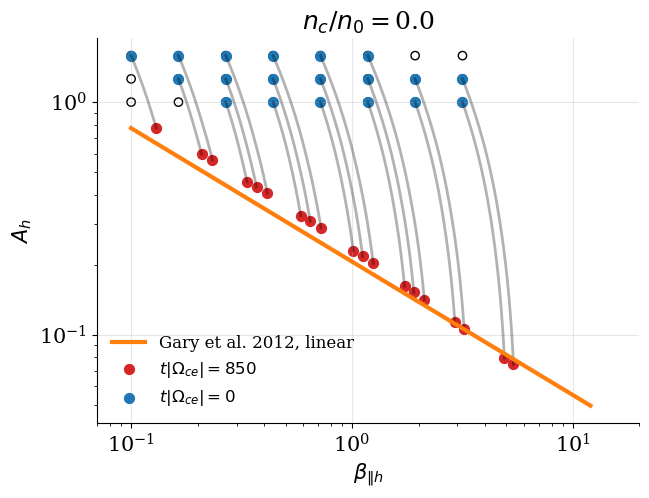

In [6]:
fig, ax = plt.subplots(figsize=(7, 5))

# pick a nh/ne ration from the list above
delta = 1.0

# mark all the initial conditions
params = np.load("data/ensemble_QLT/delta_" + str(delta) + "/params.npy")
ax.scatter(params[:, 2], params[:, 1], marker="o", facecolors='none', edgecolors='k')

# plot the results for converged simulations
for ii in range(0, 22):
    res = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/y_" + str(ii) + ".npy")
    t = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/t_" + str(ii) + ".npy")
    
    if np.abs(len(t))>100: 
        ax.plot(res[3, :]*params[0, 0], res[2, :]/res[3, :] -1, color="black", alpha=0.3, linewidth=2)
        ax.scatter(res[3, 0]*params[0, 0], res[2, 0]/res[3, 0] -1, marker="o", color='tab:blue', s=50)
        ax.scatter(res[3, -1]*params[0, 0], res[2, -1]/res[3, -1] -1, marker="o", color='tab:red', s=50)

ax.plot(np.linspace(1e-1, 12, 1000), get_A(nc_n0=1-params[0, 0], beta_par=np.linspace(1e-1, 12, 1000)), linewidth=3, c="tab:orange", ls="-", label=r"Gary et al. 2012, linear")

ax.scatter(np.nan, np.nan, marker="o", color='tab:red', s=50, label="$t|\Omega_{ce}|=850$")
ax.scatter(np.nan, np.nan, marker="o", color='tab:blue', s=50, label="$t|\Omega_{ce}|=0$")

legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='lower left')
legend.get_frame().set_alpha(0)

ax.grid(alpha=0.3)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim(7e-2, 2e1)
ax.set_title("$n_{c}/n_{0} = $" + str(round(1-params[0, 0], 2)))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

_ = ax.set_xlabel(r"$\beta_{\|h}$")
_ = ax.set_ylabel(r"$A_{h}$")

plt.savefig("figs/gary_2012/A_beta_QLT_" + str(round(1-params[0, 0], 2)) + ".png", dpi=300, bbox_inches='tight')

## $\delta B^2/B_{0}^2$ at saturation

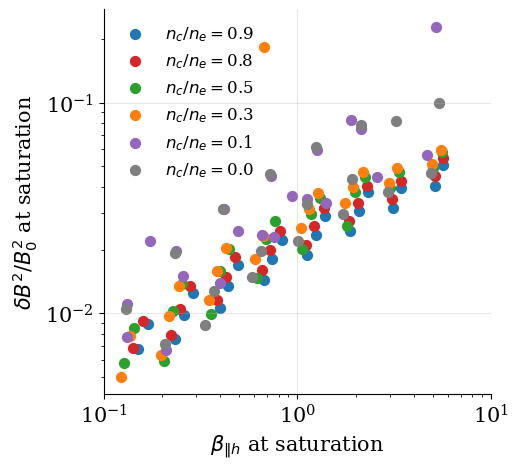

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))

kk=0 

colors = ["tab:blue", "tab:red", "tab:green", "tab:orange", "tab:purple", "tab:grey"]

for pp, delta in enumerate(list_delta):
    params = np.load("data/ensemble_QLT/delta_" + str(delta) + "/params.npy")
    
    for ii in range(1, 22):
        res = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/y_" + str(ii) + ".npy")
        t = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/t_" + str(ii) + ".npy")
        
        if np.abs(len(t))>100: 
            if ii==2:
                ax.scatter(res[3, -1]*params[0, 0], 2*np.sum(res[4:, -1])*0.00959, marker="o", s=50, color=colors[pp], label=r"$n_{c}/n_{e} = $" + str(round(1-params[0, 0], 2))) 
            else:
                ax.scatter(res[3, -1]*params[0, 0], 2*np.sum(res[4:, -1])*0.00959, marker="o", s=50, color=colors[pp]) 
    
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc="upper left")
legend.get_frame().set_alpha(0)

ax.grid(alpha=0.3)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xticks([1e-1, 1e0, 1e1])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

_ = ax.set_ylabel(r"$\delta B^2/B_{0}^2$ at saturation")
_ = ax.set_xlabel(r"$\beta_{\|h}$ at saturation")

plt.savefig("figs/gary_2012/dB_beta_h.png", dpi=300, bbox_inches='tight')

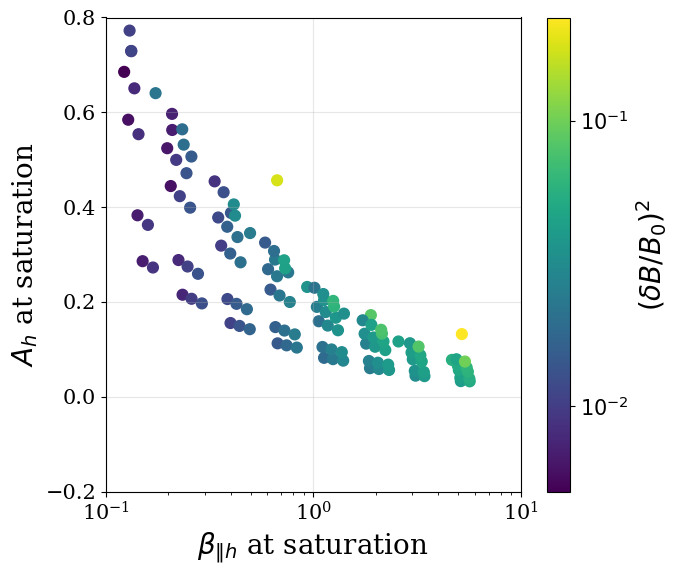

In [8]:
fig, ax = plt.subplots(figsize=(7, 6))

beta_vec = np.ones(21*6)*np.nan
T_rat_vec = np.ones(21*6)*np.nan
B_vec = np.ones(21*6)*np.nan
kk=0

for pp, delta in enumerate(list_delta):
    params = np.load("data/ensemble_QLT/delta_" + str(delta) + "/params.npy")
    
    for ii in range(1, 22):
        res = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/y_" + str(ii) + ".npy")
        t = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/t_" + str(ii) + ".npy")
        
        if np.abs(len(t))>100: 
            beta_vec[kk] = res[3, -1]*params[0, 0]
            T_rat_vec[kk] = res[2, -1]/res[3, -1] 
            B_vec[kk] = 2*np.sum(res[4:, -1])*0.00959
            kk+=1


pos = ax.scatter(beta_vec[:-2], T_rat_vec[:-2]-1, c=np.log10(B_vec[:-2]), cmap="viridis", s=60)

cbar = fig.colorbar(pos, ticks=[-1, -2])
cbar.ax.set_yticklabels(['$10^{-1}$', '$10^{-2}$']) 
cbar.set_label(r"$(\delta B/B_{0})^2$", fontsize=20)
ax.grid(alpha=0.3)
ax.set_xscale("log")
ax.set_ylim(-0.2, 0.8)
ax.set_xlim(1e-1, 10)

_ = ax.set_ylabel(r"$A_{h}$ at saturation", fontsize=20)
_ = ax.set_xlabel(r"$\beta_{\|h}$ at saturation", fontsize=20)
plt.tight_layout()
plt.savefig("figs/gary_2012/A_h_beta_h_dB.png", dpi=300, bbox_inches='tight')

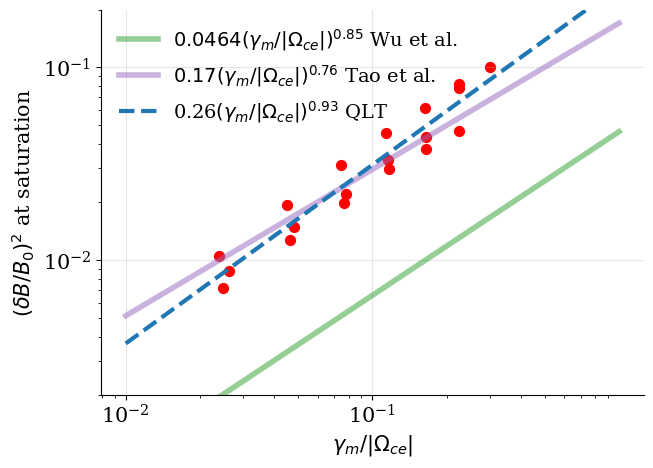

In [75]:
fig, ax = plt.subplots(figsize=(7, 5))

kk=0

data = np.zeros((22, 2))
# pick a nh/ne ration from the list above
delta = 1.
params = np.load("data/ensemble_QLT/delta_" + str(delta) + "/params.npy")

for ii in range(22):
    res = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/y_" + str(ii) + ".npy")
    t = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/t_" + str(ii) + ".npy")
    
    if np.abs(len(t))>100: 
        beta_par_h_init = params[ii, 2]/delta # initial beta parallel 
        A_h_init = params[ii, 1] # initial anisotropic level
        
        if delta != 1:
            # cold electrons
            beta_par_c_init = beta_par_h_init/100/(1-delta)# initial beta parallel 
            # ions 
            beta_par_i_init = beta_par_c_init*(1-delta)
            # 
            include_cold = True
        else:
            beta_par_c_init = 0
            beta_par_i_init = beta_par_h_init/100
            include_cold = False
            
        # perpendicular beta for plotting 
        beta_perp_c_init =  beta_par_c_init  # initial beta perpendicular 
        beta_perp_h_init =  (A_h_init + 1) * beta_par_h_init  # initial beta perpendicular 
        
        z_vec = get_z_vec(q_vec=q_vec_original, A_h=A_h_init, A_c=0, beta_par_c=beta_par_c_init, 
                  beta_par_h=beta_par_h_init, beta_par_i=beta_par_i_init, delta=delta, include_cold=include_cold)
        
        gamma_max = np.max(z_vec.imag)
        ax.scatter(gamma_max, 2*np.sum(res[4:, -1])*0.00959, marker="o", s=50, color="red") 
        
        data[kk, 0] = gamma_max
        data[kk, 1] = 2*np.sum(res[4:, -1])*0.00959
        kk+=1

# fit the data to a log-log straight line 
data_new = data[np.where(data[:, 0] != 0)]
C_opt, D_opt = np.polyfit(np.log10(data_new[:, 0]), np.log10(data_new[:, 1]), 1)

# Compute R^2
y_pred = (10**D_opt)*(data_new[:, 0]**C_opt)
ss_tot = np.sum((data_new[:, 1] - np.mean(data_new[:, 1]))**2)
ss_res = np.sum((data_new[:, 1] - y_pred)**2)
r2 = 1 - (ss_res / ss_tot)


x_axis = 10**np.linspace(-2, 0, 100)
if delta == 0.5:
    ax.plot(x_axis, 0.0371*(x_axis**0.76), label=r"$0.0371 (\gamma_{m}/|\Omega_{ce}|)^{0.76}$ Wu et al. ", linewidth=4, color="tab:green", alpha=0.5)
elif delta == 0.2:
    ax.plot(x_axis, 0.0751*(x_axis**0.7), label=r"$0.0705 (\gamma_{m}/|\Omega_{ce}|)^{0.7}$ Wu et al. ", linewidth=4, color="tab:green", alpha=0.5)
elif delta == 1.:
    ax.plot(x_axis, 0.0464*(x_axis**0.85), label=r"$0.0464 (\gamma_{m}/|\Omega_{ce}|)^{0.85}$ Wu et al. ", linewidth=4, color="tab:green", alpha=0.5)
    ax.plot(x_axis, 0.17*(x_axis**0.76), label=r"$0.17 (\gamma_{m}/|\Omega_{ce}|)^{0.76}$ Tao et al. ", linewidth=4, color="tab:purple", alpha=0.5)


ax.plot(x_axis, (10**D_opt)*(x_axis**C_opt), label=str(round(10**D_opt, 2))+ r"$(\gamma_{m}/|\Omega_{ce}|)^{" + str(round(C_opt, 2)) +r"}$ QLT", ls="--", color="tab:blue", linewidth=3) 

legend = ax.legend(ncols=1, fancybox=False, shadow=False,  loc="upper left", fontsize=14)
legend.get_frame().set_alpha(0)

#ax.set_title("$n_{c}/n_{0} = $" + str(round(1-params[0, 0], 2)))

ax.grid(alpha=0.3)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xticks([1e-2, 1e-1])
ax.set_yticks([1e-2, 1e-1])
ax.set_ylim(2e-3, 2e-1)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

_ = ax.set_ylabel(r"$(\delta B/B_{0})^2$ at saturation")
_ = ax.set_xlabel(r"$\gamma_{m}/|\Omega_{ce}|$")

plt.savefig("figs/gary_2012/dB_gamma_" + str(round(1-params[0, 0], 2)) + ".png", dpi=300, bbox_inches='tight')

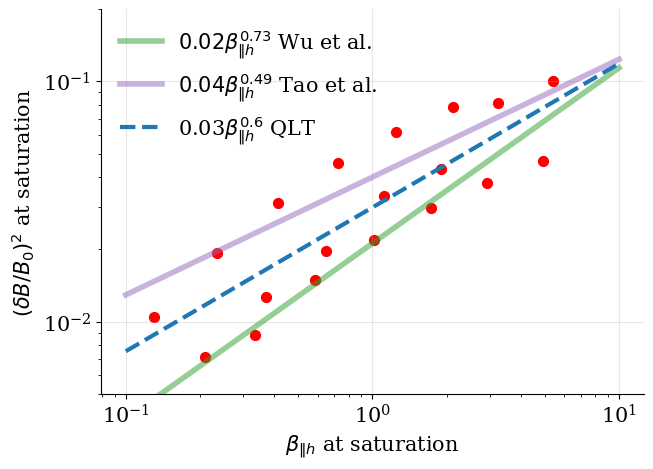

In [71]:
fig, ax = plt.subplots(figsize=(7, 5))

kk=0 

data = np.zeros((22, 2))
# pick a nh/ne ration from the list above
delta = 1.
params = np.load("data/ensemble_QLT/delta_" + str(delta) + "/params.npy")

for ii in range(22):
    res = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/y_" + str(ii) + ".npy")
    t = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/t_" + str(ii) + ".npy")
    
    if np.abs(len(t))>100: 
        ax.scatter(res[3, -1]*params[0, 0], 2*np.sum(res[4:, -1])*0.00959, marker="o", s=50, color="red") 
        data[kk, 0] = res[3, -1]*params[0, 0]
        data[kk, 1] = 2*np.sum(res[4:, -1])*0.00959
        kk+=1

# plot results from Wu et al. 2019 JGR
beta_vec = 10**np.linspace(-1, 1, 50)
if delta == 0.5:
    ax.plot(beta_vec, 0.0237*(beta_vec**0.57), label=r"$0.02 \beta_{\|h}^{0.57}$ Wu et al.", linewidth=4, color="tab:green", alpha=0.5)
elif delta == 0.2:
    ax.plot(beta_vec, 0.0237*(beta_vec**0.5), label=r"$0.02 \beta_{\|h}^{0.5}$ Wu et al. ", linewidth=4, color="tab:green", alpha=0.5)
elif delta == 1:
    ax.plot(beta_vec, 0.0212*(beta_vec**0.73),  label=r"$0.02 \beta_{\|h}^{0.73}$ Wu et al. ", linewidth=4, color="tab:green", alpha=0.5)
    ax.plot(beta_vec, 0.04*(beta_vec**0.49),  label=r"$0.04 \beta_{\|h}^{0.49}$ Tao et al. ", linewidth=4, color="tab:purple", alpha=0.5)
    


# fit the data to a log-log straight line 
data_new = data[np.where(data[:, 0] != 0)]
C_opt, D_opt = np.polyfit(np.log10(data_new[:, 0]), np.log10(data_new[:, 1]), 1)

# Compute R^2
y_pred = (10**D_opt)*(data_new[:, 0]**C_opt)
ss_tot = np.sum((data_new[:, 1] - np.mean(data_new[:, 1]))**2)
ss_res = np.sum((data_new[:, 1] - y_pred)**2)
r2 = 1 - (ss_res / ss_tot)

ax.plot(beta_vec, (10**D_opt)*(beta_vec**C_opt), label=str(round(10**D_opt, 2))+ r"$\beta_{\|h}^{" + str(round(C_opt, 2)) +r"}$ QLT", ls="--", color="tab:blue", linewidth=3) 



legend = ax.legend(ncols=1, fancybox=False, shadow=False,  loc="upper left")
legend.get_frame().set_alpha(0)

#ax.set_title("$n_{c}/n_{0} = $" + str(round(1-params[0, 0], 2)))

ax.grid(alpha=0.3)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xticks([1e-1, 1e0, 1e1])
ax.set_yticks([1e-2, 1e-1])
ax.set_ylim(5e-3, 2e-1)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

_ = ax.set_ylabel(r"$(\delta B/B_{0})^2$ at saturation")
_ = ax.set_xlabel(r"$\beta_{\|h}$ at saturation")

plt.savefig("figs/gary_2012/dB_beta_" + str(round(1-params[0, 0], 2)) + ".png", dpi=300, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

kk=0 

colors = ["tab:blue", "tab:red", "tab:green", "tab:orange", "tab:purple"]

for pp, delta in enumerate(list_delta):
    params = np.load("data/ensemble_QLT/delta_" + str(delta) + "/params.npy")
    
    for ii in range(2, 22, 4):
        res = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/y_" + str(ii) + ".npy")
        t = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/t_" + str(ii) + ".npy")
        
        if np.abs(len(t))>100: 
            if pp==0:
                ax.scatter(1-params[0, 0], 2*np.sum(res[4:, -1])*0.00959, marker="o", s=50, color=colors[ii//4], label=r"$A_{h} = $" + str(round(res[2, 0]/res[3, 0] -1, 2)) + r" and $\beta_{\|h} = $" + str(round(res[3, 0]*params[0, 0], 2))) 
            else:
                ax.scatter(1-params[0, 0], 2*np.sum(res[4:, -1])*0.00959, marker="o", s=50, color=colors[ii//4]) 
    
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc="upper right")
legend.get_frame().set_alpha(0)

ax.grid(alpha=0.3)

ax.set_ylim(0, 0.1)
ax.set_xticks([0, 0.1, 0.3, 0.5, 0.8, 0.9])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

_ = ax.set_ylabel(r"$\delta B^2/B_{0}^2$ at saturation")
_ = ax.set_xlabel(r"$n_{c}/n_{e}$")

plt.savefig("figs/gary_2012/dB_five_params.png", dpi=300, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

data = np.zeros((500, 2, list_delta))

for pp, delta in enumerate(list_delta):
params = np.load("data/ensemble_QLT/delta_0.9/params.npy")

    ax.scatter(params[:, 2], params[:, 1], marker="o", facecolors='none', edgecolors='k')
    
    for ii in range(0, 22):
        res = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/y_" + str(ii) + ".npy")
        t = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/t_" + str(ii) + ".npy")
        
        if np.abs(len(t))>100: 
            ax.plot(res[3, :]*params[0, 0], res[2, :]/res[3, :] -1, color="black", alpha=0.3, linewidth=2)
            ax.scatter(res[3, 0]*params[0, 0], res[2, 0]/res[3, 0] -1, marker="o", color='tab:blue', s=50)
            ax.scatter(res[3, -1]*params[0, 0], res[2, -1]/res[3, -1] -1, marker="o", color='tab:red', s=50)
    
    ax.plot(np.linspace(1e-1, 12, 1000), get_A(nc_n0=1-params[0, 0], beta_par=np.linspace(1e-1, 12, 1000)), linewidth=3, c="tab:orange", ls="-", label=r"Gary et al. 2012, linear")

    ax.scatter(np.nan, np.nan, marker="o", color='tab:red', s=50, label="$t|\Omega_{ce}|=850$")
    ax.scatter(np.nan, np.nan, marker="o", color='tab:blue', s=50, label="$t|\Omega_{ce}|=0$")
    
    legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='lower left')
    legend.get_frame().set_alpha(0)

ax.grid(alpha=0.3)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim(7e-2, 2e1)

ax.set_title("$n_{c}/n_{0} = $" + str(round(1-params[0, 0],1)))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

_ = ax.set_xlabel(r"$\beta_{\|h}$")
_ = ax.set_ylabel(r"$A_{h}$")

plt.savefig("figs/gary_2012/A_beta_QLT_" + str(round(1-params[0, 0], 2)) + ".png", dpi=300, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots()
for ii in range(0, 10):
        res = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/y_" + str(ii) + ".npy")
        t = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/t_" + str(ii) + ".npy")
        if np.abs(len(t))>100: 
            plt.plot(t, res[2, :]/res[3, :] - 1)
_ = ax.set_ylabel(r"$A_{h}$")
_ = ax.set_xlabel(r"$t|\Omega_{ce}|$")

plt.savefig("figs/gary_2012/A_in_time.png", dpi=300)

In [ ]:
fig, ax = plt.subplots()
for ii in range(0, 10):
        res = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/y_" + str(ii) + ".npy")
        t = np.load("data/ensemble_QLT/delta_" + str(params[0, 0]) + "/t_" + str(ii) + ".npy")
        if np.abs(len(t))>100: 
            plt.plot(t, res[-1, :])
plt.yscale("log")